> This is a rework of my task during Computer Vision class in 2022.

> Goal(s):
- to implement image band-pass filter based on instructed and required steps.

> Requirement(s):
- first, convolve the original image `f(x, y)` with a spatial mask with a small variance to produce an output image `g1(x, y)`.
- then, convolve original image with another spatial mask with a large variance to produce an output image `g2(x, y)`.
- finally, obtain the result by computing the difference `g1(x, y) - g2(x, y)`.

# Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage

# Image Preparation

In [2]:
def show_img(img, title, cmap=None):
  plt.imshow(img, cmap=cmap)
  plt.title(title)
  plt.axis('off')

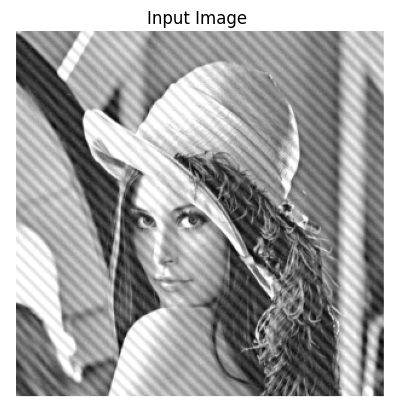

In [3]:
img = cv2.imread('dataset/image-filter_2/noisy_lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img(img, 'Input Image', 'gray')

# Apply Gaussian Filter

In [4]:
def gaussian_kernel(k_size, sigma):
  x, y = np.mgrid[-k_size : k_size + 1, -k_size : k_size + 1]
  g =  (1 / (2 * np.pi * (sigma ** 2))) * np.exp(-1 * ((x ** 2 + y ** 2) / (2 * (sigma ** 2))))
  return g

# Produce `g1(x, y)`

> Convolve the original image `f(x, y)` with a spatial mask with a small variance to produce an output image `g1(x, y)`.

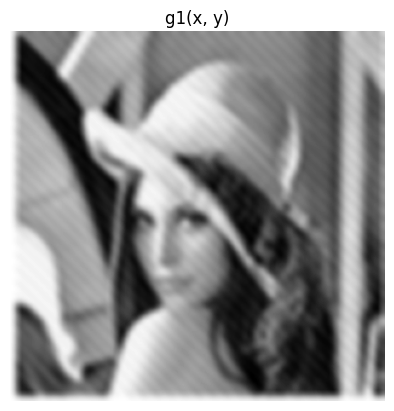

In [5]:
g1 = ndimage.convolve(img, gaussian_kernel(5, 3))
show_img(g1, 'g1(x, y)', 'gray')

# Produce `g2(x, y)`

> Then, convolve original image again with another spatial mask with a large variance to produce an output image `g2(x, y)`.

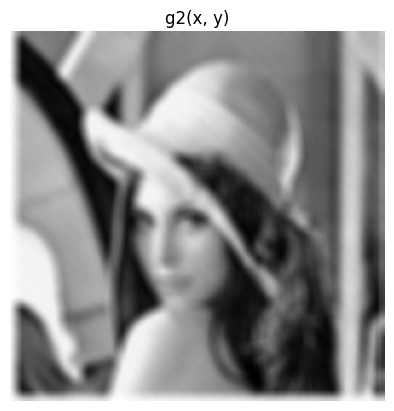

In [6]:
g2 = ndimage.convolve(img, gaussian_kernel(5, 5))
show_img(g2, 'g2(x, y)', 'gray')

# Result `g1(x, y) - g2(x, y)`

> Finally, obtain the result by computing the difference `g1(x, y) - g2(x, y)`.

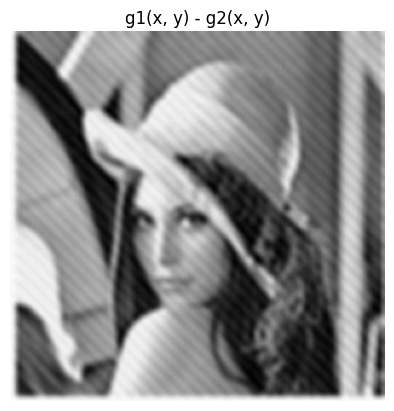

In [7]:
res = g1 - g2
show_img(res, 'g1(x, y) - g2(x, y)', 'gray')